In [1]:
import numpy as np
import pandas as pd
import os
for dir_name,_,filenames in os.walk("C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis"):
    for filename in filenames:
        print(os.path.join(dir_name,filename))

C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (10).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (100).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1000).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1001).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1002).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (101).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (102).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (103).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (104).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (105).png
C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import tensorflow as tn
import keras 
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from keras.models import Sequential
%matplotlib inline


In [3]:
train_path="C:\MINOR\Multiple Scelorisis\Dataset\seg_train"

In [4]:
import os
import glob as gb

# Specify the base directory path
base_path = 'C:\MINOR\Multiple Scelorisis\Dataset'

# Construct the full path to the 'seg_train' directory
train_path = os.path.join(base_path, 'Multiple Sclerosis')


folders = os.listdir(train_path)

# Iterate over the folders
for folder in folders:
    folder_path = os.path.join(train_path, folder)
    
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    
    # Print the number of files found in the current folder
    print(f"For training data, found {len(files)} in folder {folder}")

For training data, found 1002 in folder Control-Axial
For training data, found 1014 in folder Control-Sagittal
For training data, found 650 in folder MS-Axial
For training data, found 761 in folder MS-Sagittal


In [5]:
size = []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(569, 1158, 4)    2764
(638, 1222, 4)     425
(628, 1158, 4)     170
(695, 1222, 4)      46
(661, 1493, 4)      14
(618, 758, 4)        2
(719, 1493, 4)       2
(606, 722, 4)        1
(515, 450, 4)        1
(543, 487, 4)        1
(687, 912, 4)        1
dtype: int64

In [6]:
code ={'Control-Axial':0,'Control-Sagittal':1,'MS-Axial':2,'MS-Sagittal':3}

def get_code(n) :
    for x , y in code.items():
        if n==y :
            return x

In [7]:
import cv2


In [8]:
s=150

In [9]:
x_train= []
y_train= []
for folder in folders:
    # Construct the full path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of files in the current folder
    files = gb.glob(os.path.join(folder_path, '*.png'))
    for file in files:
        image =cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        x_train.append(list(image_array))
        y_train.append(code[folder])

In [10]:
print(f'we have {len(x_train)} in x_train')


we have 3427 in x_train


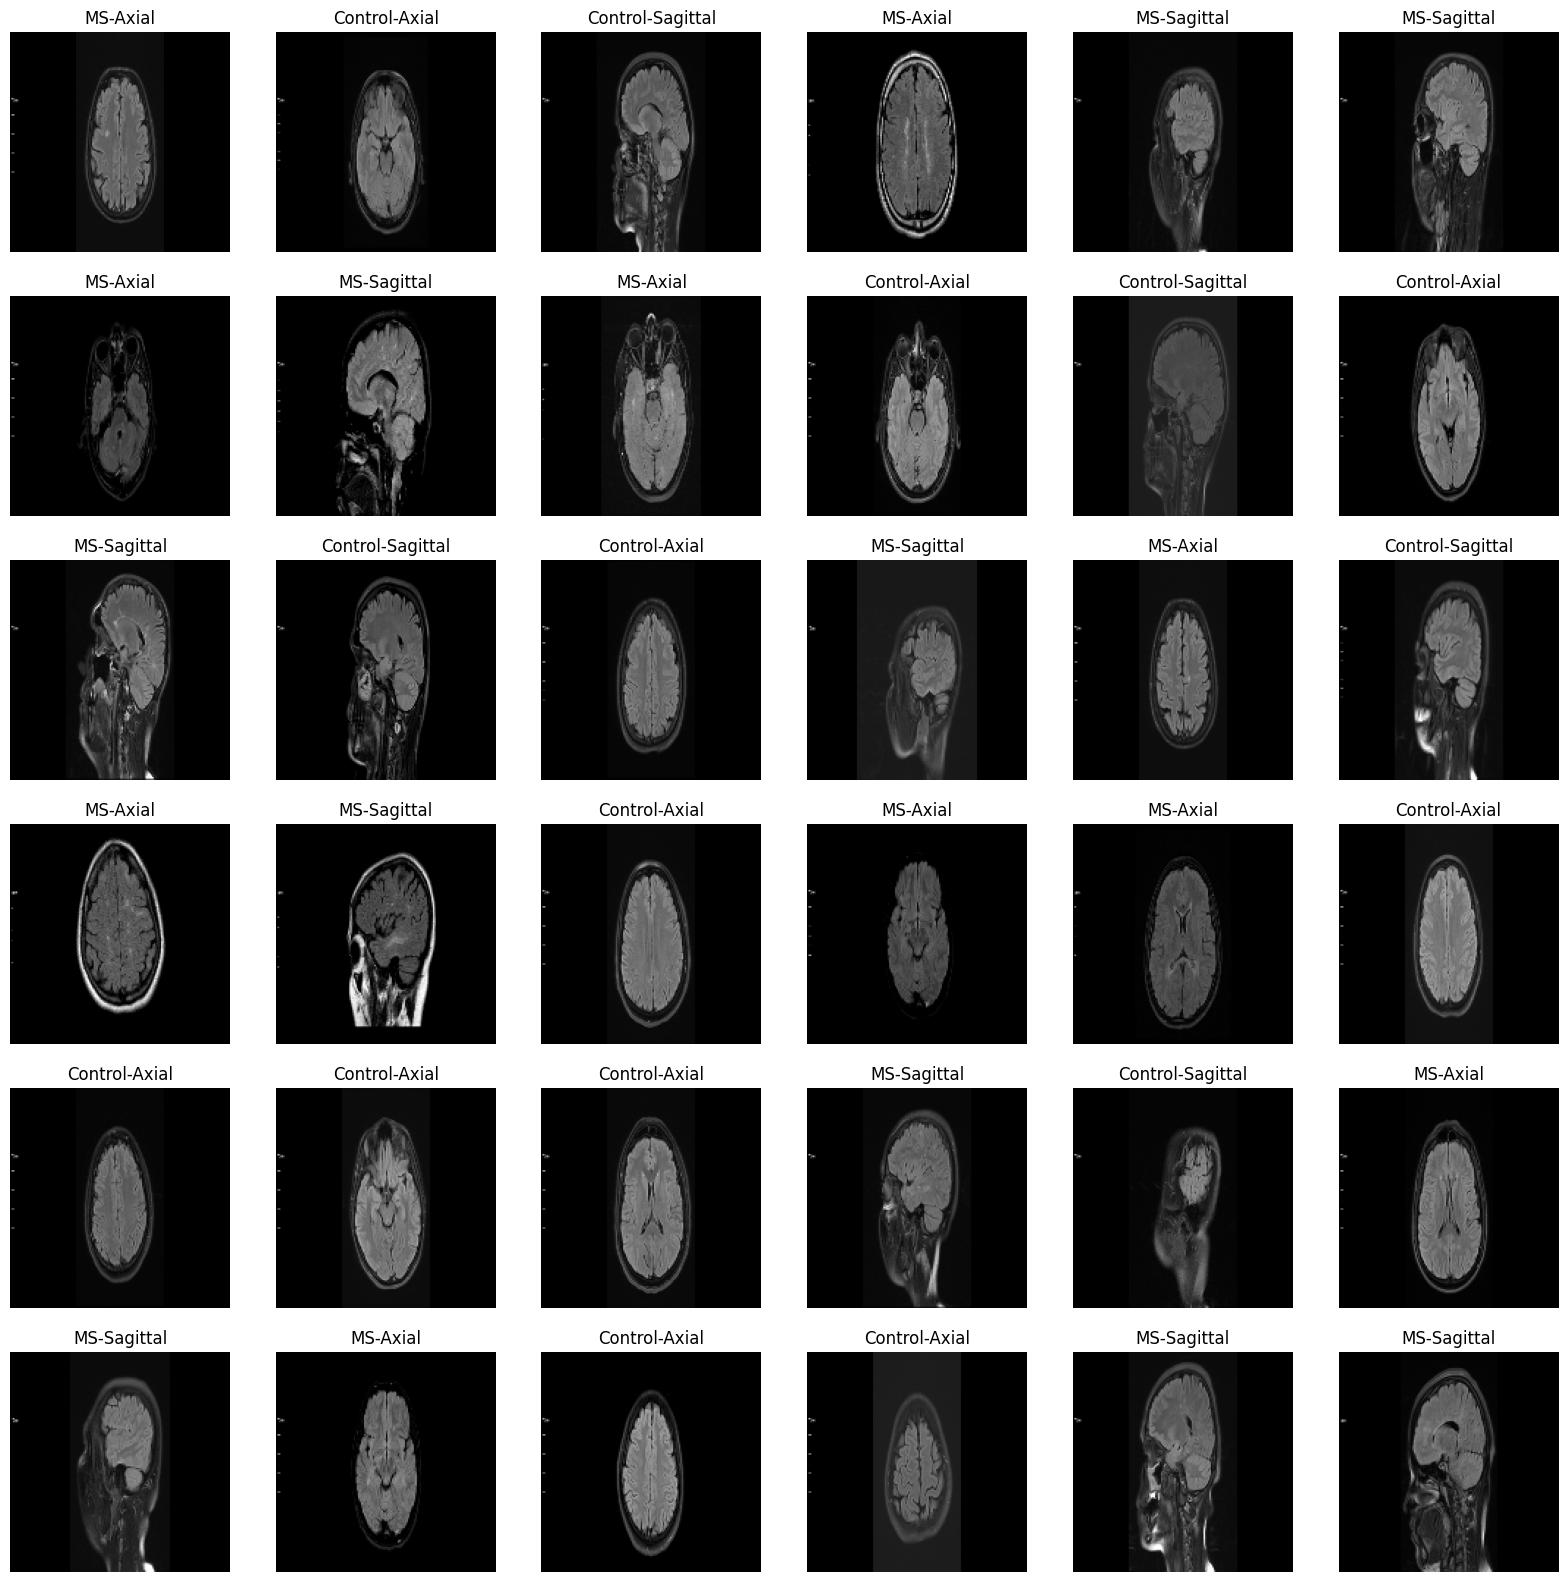

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('Off')
    plt.title(get_code(y_train[i]))

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
print(f'x_train shape is {x_train.shape}')
print(f'y_train shape is {y_train.shape}')

x_train shape is (3427, 150, 150, 3)
y_train shape is (3427,)


In [13]:
from keras.layers import MaxPooling2D,Dropout


Epoch 1/30
86/86 [==============================] - 65s 737ms/step - loss: 0.6377 - accuracy: 0.7147 - val_loss: 0.3580 - val_accuracy: 0.8834
Epoch 2/30
86/86 [==============================] - 66s 765ms/step - loss: 0.3638 - accuracy: 0.8475 - val_loss: 0.2529 - val_accuracy: 0.9184
Epoch 3/30
86/86 [==============================] - 53s 608ms/step - loss: 0.2751 - accuracy: 0.8960 - val_loss: 0.1985 - val_accuracy: 0.9446
Epoch 4/30
86/86 [==============================] - 52s 608ms/step - loss: 0.2294 - accuracy: 0.9092 - val_loss: 0.1963 - val_accuracy: 0.9155
Epoch 5/30
86/86 [==============================] - 50s 585ms/step - loss: 0.1751 - accuracy: 0.9281 - val_loss: 0.1610 - val_accuracy: 0.9563
Epoch 6/30
86/86 [==============================] - 50s 586ms/step - loss: 0.1511 - accuracy: 0.9369 - val_loss: 0.1622 - val_accuracy: 0.9621
Epoch 7/30
86/86 [==============================] - 50s 579ms/step - loss: 0.1475 - accuracy: 0.9486 - val_loss: 0.1566 - val_accuracy: 0.9534

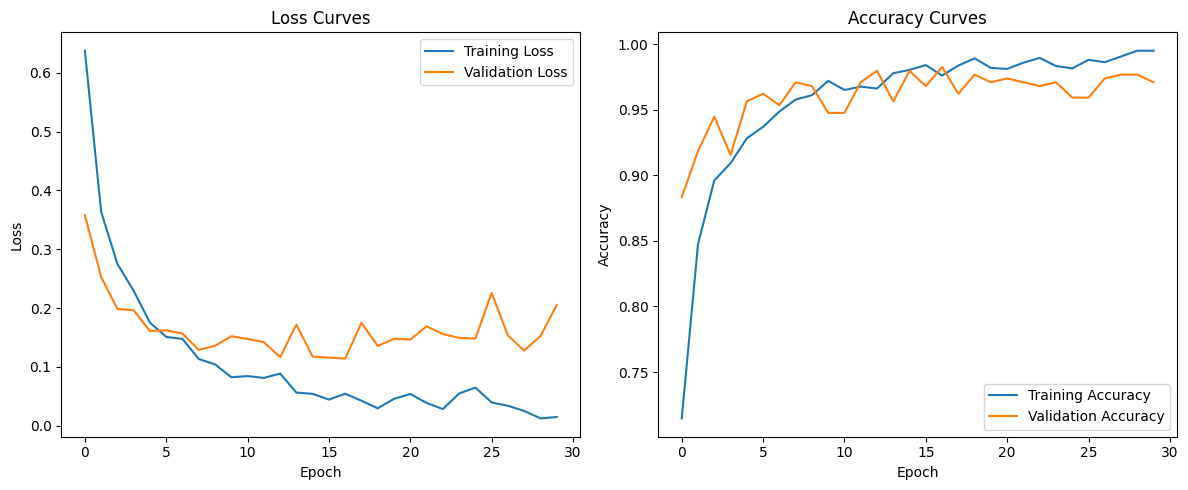

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Split the data into training and validation sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Number of classes
num_classes = 4  # Change this to the number of classes in your dataset

# Step 2: Architecture Design
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(s, s, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Output layer with the number of classes

# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# One-hot encode the target labels
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

# Step 5: Training
history = model.fit(x_train, y_train_encoded,
                    batch_size=32,
                    epochs=30,
                    validation_data=(x_val, y_val_encoded))

# Evaluate the model on the test set
y_test_encoded = to_categorical(y_test, num_classes)
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

In [15]:
test_loss,test_accuracy=model.evaluate(x_test,y_test_encoded)
print("Test accuracy",test_accuracy)

11/11 [==============================] - 2s 155ms/step - loss: 0.4000 - accuracy: 0.9534
Test accuracy 0.9533527493476868


11/11 [==============================] - 2s 150ms/step
Classification_report:
               precision    recall  f1-score   support

      Class0       0.94      0.98      0.96       102
      Class1       0.94      1.00      0.97       105
      Class2       0.97      0.90      0.93        68
      Class3       0.98      0.90      0.94        68

    accuracy                           0.95       343
   macro avg       0.96      0.94      0.95       343
weighted avg       0.95      0.95      0.95       343



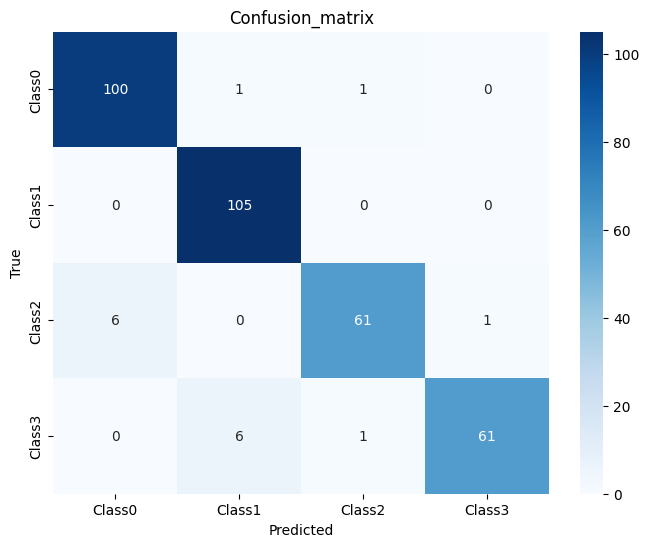

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
import numpy as np
true_labels=y_test
predicted_probabilites=model.predict(x_test)
predicted_labels=np.argmax(predicted_probabilites,axis=1)
report=classification_report(true_labels,predicted_labels,target_names=[f'Class{i}' for i in range(num_classes)])
print('Classification_report:\n',report)
precision=precision_score(predicted_labels,true_labels,average='weighted')
recall=recall_score(predicted_labels,true_labels,average='weighted')
f1=f1_score(predicted_labels,true_labels,average='weighted')
cm=confusion_matrix(true_labels,predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=[f'Class{i}'for i in range(num_classes)],
            yticklabels=[f'Class{i}'for i in range(num_classes)])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion_matrix')
plt.show()

In [18]:
from tensorflow.keras.models import load_model
model.save("CNN(GRAD_CAM).h5")

In [22]:
model=load_model("CNN(GRAD_CAM).h5")

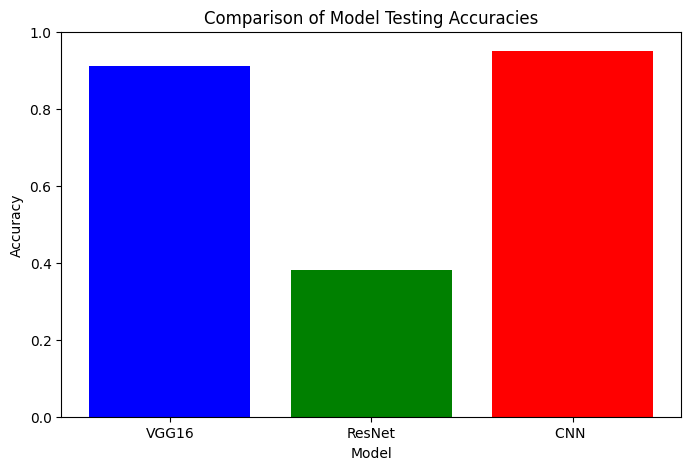

In [1]:
import matplotlib.pyplot as plt

# Replace these with the actual accuracy values for each model.
accuracy_values = {
    'VGG16': 0.91,  # Replace with the final accuracy for VGG16.
    'ResNet': 0.38,       # Replace with the final accuracy for ResNet.
    'CNN ': 0.95  # Replace with the final accuracy for the model used in Grad-CAM.
}

# Extract model names and their respective accuracies.
models = list(accuracy_values.keys())
accuracies = list(accuracy_values.values())

# Create a bar graph.
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Testing Accuracies')
plt.ylim(0, 1)  # Accuracy values range from 0 to 1.
plt.show()

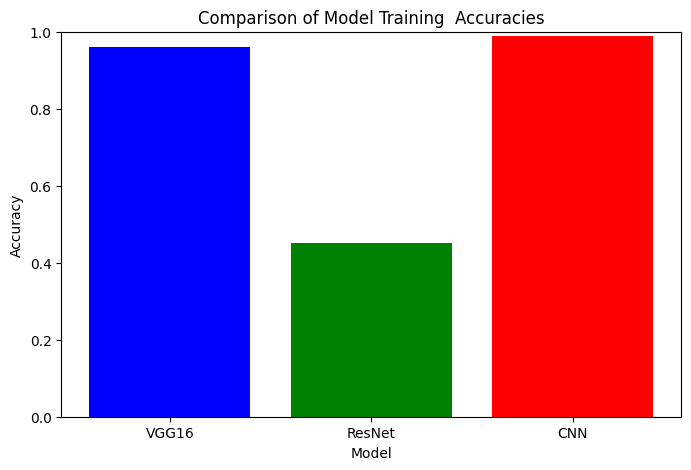

In [3]:
import matplotlib.pyplot as plt

# Replace these with the actual accuracy values for each model.
accuracy_values = {
    'VGG16': 0.96,  # Replace with the final accuracy for VGG16.
    'ResNet': 0.45,       # Replace with the final accuracy for ResNet.
    'CNN': 0.99  # Replace with the final accuracy for the model used in Grad-CAM.
}

# Extract model names and their respective accuracies.
models = list(accuracy_values.keys())
accuracies = list(accuracy_values.values())

# Create a bar graph.
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Training  Accuracies')
plt.ylim(0, 1)  # Accuracy values range from 0 to 1.
plt.show()

In [26]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from keras import backend as K

from tensorflow.python.framework import ops 

In [27]:
model = load_model("CNN(GRAD_CAM).h5")


In [28]:
img_size = (150, 150)
mapping = {0:'Control-Axial', 1:'Control-Sagittal', 2:'MS-Axial', 3:'MS-Sagittal'}

last_conv_layer_name = "conv2d_2" 
img_path="C:\MINOR\Multiple Scelorisis\Dataset\Multiple Sclerosis\Control-Axial\C-A (1).png"

In [29]:
def load_image(path, preprocess=True):
    img_temp = cv2.imread(path)
    img_temp = cv2.resize(img_temp, img_size)
    img_temp = img_temp.astype('float32') / 255.0 
    if preprocess:
        img_temp= np.array(img_temp)
        img_temp = np.expand_dims(img_temp, axis=0)
    return img_temp

def deprocess_image(x):
    x = x.copy()
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255 #to convert into RGB
    if K.common.image_dim_ordering() == 'th': #to convert type 'th' to type 'tf'
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [38]:
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K

def build_guided_model():
    if "GuidedBackProp" not in ops._gradient_registry._registry:  # avoid over-writing
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.compat.v1.cast(grad > 0., dtype) * \
                   tf.compat.v1.cast(op.inputs[0] > 0., dtype)

    g = tf.compat.v1.get_default_graph()  # Using tf.compat.v1 to get the default graph in TensorFlow 2.x
    with g.gradient_override_map({'Relu': 'GuidedBackProp'}):
        new_model = load_model("CNN(GRAD_CAM).h5")  # Replace with your model file path
    return new_model

# Guided Backpropagation method
def guided_backprop(input_model, images, layer_name):
    input_imgs = input_model.input
    layer_output = input_model.get_layer(layer_name).output
    grads = K.gradients(layer_output, input_imgs)[0]
    backprop_fn = K.function([input_imgs, K.learning_phase()], [grads])
    grads_val = backprop_fn([images, 0])[0]
    return grads_val


In [39]:
import tensorflow as tf

def grad_cam(input_model, image, cls, layer_name):
    image_tensor = tf.convert_to_tensor(image)  # Convert image to TensorFlow tensor
    with tf.GradientTape() as tape:
        tape.watch(image_tensor)
        y_c = input_model.output[0, cls]
        conv_output = input_model.get_layer(layer_name).output

    grads = tape.gradient(y_c, tf.convert_to_tensor(image))[0]
    grads_val = grads[0]

    grads_val = grads_val / np.max(np.abs(grads_val))

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = cv2.resize(cam, dsize=(img_size[1], img_size[0]), interpolation=cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()

    return cam

In [40]:
import tensorflow as tf
import numpy as np

def grad_cam(input_model, image, cls, layer_name):
    with tf.GradientTape() as tape:
        tape.watch(image)
        y_c = input_model.output[0, cls]
        conv_output = input_model.get_layer(layer_name).output
        grads = tape.gradient(y_c, tf.convert_to_tensor(image))[0]
    gradient_function = tf.keras.backend.function([input_model.input], [conv_output, grads])
    output, grads_val = gradient_function([image])

In [41]:
guided_model = build_guided_model()
